# Intro to Machine Learning - Enron fraud

This is the project for  Udacity  Course **[Intro to Machine Learning](https://www.udacity.com/course/intro-to-machine-learning--ud120)**

In [1]:
#!/usr/bin/python
import sys
import pickle
import matplotlib.pyplot as plt

sys.path.append("../tools/")

### Load the dictionary containing the dataset

Load the pkl data as dict file, then import the dict to pandas dataframe. 

In [2]:
import pandas as pd
import numpy as np
data_dict = pickle.load(open("final_project_dataset.pkl", "r") )

###creating dataFrame from dictionary - pandas
df = pd.DataFrame.from_dict(data_dict, orient='index', dtype=np.float)
 
# print df.describe().loc[:,['salary','bonus']]

Since we don't know which features might be more important,
at the beginning we need to include all the features so as not to miss any important information.
So Feature_list will have all the features from the dataset.
Almost all the feature names are read from the data_dict when loading the data (in the following steps).
However, here I would like to remove the "email_address",
since it's a text and its information for the algorithm is not as important
as the other numbers.

## 1: Feature selection

Features_list is a list of strings, each of which is a feature name. ** The first feature must be "poi" **.

Since we don't know which features might be more important,
at the beginning we need to include all the features so as not to miss any important information.
So Feature_list will have all the features from the dataset.
Almost all the feature names are read from the data_dict when loading the data (in the following steps).
However, here I would like to remove the "email_address",
since it's a text and its information for the algorithm is not as important
as the other numbers.

In [3]:
features_list = ['poi']  + [feature for feature in df if feature != 'poi' and feature != 'email_address']
df = df[features_list]
print "The Features: "
print features_list

The Features: 
['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'from_poi_to_this_person']


After loading the data, we can read the data set to see what is included in the dictionary. 

In [4]:
print df.iloc[0]

poi                                0.0
salary                        201955.0
to_messages                     2902.0
deferral_payments            2869717.0
total_payments               4484442.0
exercised_stock_options      1729541.0
bonus                        4175000.0
restricted_stock              126027.0
shared_receipt_with_poi         1407.0
restricted_stock_deferred    -126027.0
total_stock_value            1729541.0
expenses                       13868.0
loan_advances                      NaN
from_messages                   2195.0
other                            152.0
from_this_person_to_poi           65.0
director_fees                      NaN
deferred_income             -3081055.0
long_term_incentive           304805.0
from_poi_to_this_person           47.0
Name: ALLEN PHILLIP K, dtype: float64


## 2: Exploratory analysis to remove outliers

First let's define a plot function so taht we can visualize all the data by different feature.

By skimming at the data we can notice that "THE TRAVEL AGENCY IN THE PARK" and "LOCKHART EUGENE E" are the fake data. So we need to delete these two rows.

In [5]:
df = df.drop('THE TRAVEL AGENCY IN THE PARK')
df = df.drop('LOCKHART EUGENE E')

In [6]:
import matplotlib.pyplot as plt
%pylab inline

def outlier_plt(feature_idx):
    plt.title(features_list[feature_idx] + " distribution")
    df[features_list[feature_idx]].plot.hist(bins = 50, alpha = 0.5)

def print_outlier(feature_idx,cutoff):
    print df[df[features_list[feature_idx]]>= cutoff]
    print df[df[features_list[feature_idx]]>= cutoff].index
    

Populating the interactive namespace from numpy and matplotlib


### Salary hist

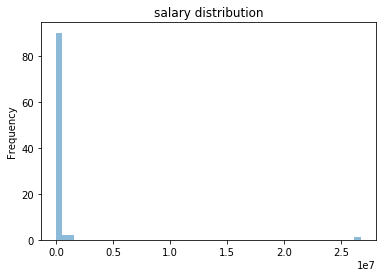

In [7]:
outlier_plt(1)

From the salary distribution plot, there is one obvious outlier which is much higher than the others. According to the axis, its value is higher than 0.5e7, so we can first print out the variables which has salary higher than 0.5e7

In [8]:
print df[df['salary']>= 0.5e7]
print df[df['salary']>= 0.5e7].index

       poi      salary  to_messages  deferral_payments  total_payments  \
TOTAL  0.0  26704229.0          NaN         32083396.0     309886585.0   

       exercised_stock_options       bonus  restricted_stock  \
TOTAL              311764000.0  97343619.0       130322299.0   

       shared_receipt_with_poi  restricted_stock_deferred  total_stock_value  \
TOTAL                      NaN                 -7576788.0        434509511.0   

        expenses  loan_advances  from_messages       other  \
TOTAL  5235198.0     83925000.0            NaN  42667589.0   

       from_this_person_to_poi  director_fees  deferred_income  \
TOTAL                      NaN      1398517.0      -27992891.0   

       long_term_incentive  from_poi_to_this_person  
TOTAL           48521928.0                      NaN  
Index([u'TOTAL'], dtype='object')


In [9]:
df = df.drop('TOTAL')

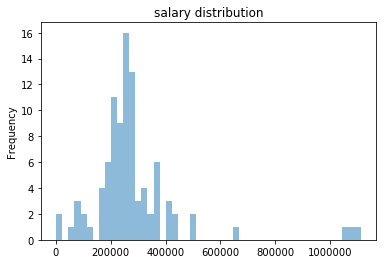

In [10]:
outlier_plt(1)

There're still some values much higher than the others, let's print them out

In [11]:
print df[df['salary']>= 8e5]
print df[df['salary']>= 8e5].index

                    poi     salary  to_messages  deferral_payments  \
FREVERT MARK A      0.0  1060932.0       3275.0          6426990.0   
LAY KENNETH L       1.0  1072321.0       4273.0           202911.0   
SKILLING JEFFREY K  1.0  1111258.0       3627.0                NaN   

                    total_payments  exercised_stock_options      bonus  \
FREVERT MARK A          17252530.0               10433518.0  2000000.0   
LAY KENNETH L          103559793.0               34348384.0  7000000.0   
SKILLING JEFFREY K       8682716.0               19250000.0  5600000.0   

                    restricted_stock  shared_receipt_with_poi  \
FREVERT MARK A             4188667.0                   2979.0   
LAY KENNETH L             14761694.0                   2411.0   
SKILLING JEFFREY K         6843672.0                   2042.0   

                    restricted_stock_deferred  total_stock_value  expenses  \
FREVERT MARK A                            NaN         14622185.0   86987.0   
LAY K

Though these people have much higher salary than the others, they are actually the pois we are looking for. So for the salary distribution everything looks fine now.

### To_messages

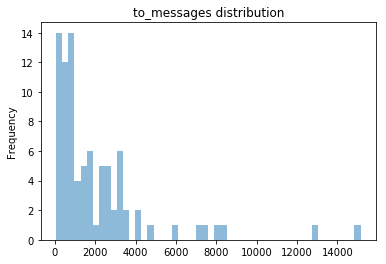

In [12]:
outlier_plt(2)

In [13]:
print_outlier(2,12000)

                   poi    salary  to_messages  deferral_payments  \
KEAN STEVEN J      0.0  404338.0      12754.0                NaN   
SHAPIRO RICHARD S  0.0  269076.0      15149.0                NaN   

                   total_payments  exercised_stock_options      bonus  \
KEAN STEVEN J           1747522.0                2022048.0  1000000.0   
SHAPIRO RICHARD S       1057548.0                 607837.0   650000.0   

                   restricted_stock  shared_receipt_with_poi  \
KEAN STEVEN J             4131594.0                   3639.0   
SHAPIRO RICHARD S          379164.0                   4527.0   

                   restricted_stock_deferred  total_stock_value  expenses  \
KEAN STEVEN J                            NaN          6153642.0   41953.0   
SHAPIRO RICHARD S                        NaN           987001.0  137767.0   

                   loan_advances  from_messages   other  \
KEAN STEVEN J                NaN         6759.0  1231.0   
SHAPIRO RICHARD S            NaN

                poi     salary  to_messages  deferral_payments  \
FREVERT MARK A  0.0  1060932.0       3275.0          6426990.0   

                total_payments  exercised_stock_options      bonus  \
FREVERT MARK A      17252530.0               10433518.0  2000000.0   

                restricted_stock  shared_receipt_with_poi  \
FREVERT MARK A         4188667.0                   2979.0   

                restricted_stock_deferred  total_stock_value  expenses  \
FREVERT MARK A                        NaN         14622185.0   86987.0   

                loan_advances  from_messages      other  \
FREVERT MARK A      2000000.0           21.0  7427621.0   

                from_this_person_to_poi  director_fees  deferred_income  \
FREVERT MARK A                      6.0            NaN       -3367011.0   

                long_term_incentive  from_poi_to_this_person  
FREVERT MARK A            1617011.0                    242.0  
Index([u'FREVERT MARK A'], dtype='object')


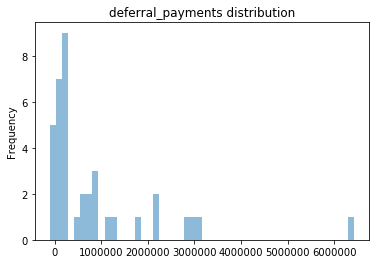

In [14]:
outlier_plt(3)
print_outlier(3,4000000)

Well, good job, Mr. FREVERT MARK. We can't do anything

In [15]:
print df[df['deferral_payments']<= 0]
print df[df['deferral_payments']<= 0].index

               poi  salary  to_messages  deferral_payments  total_payments  \
BELFER ROBERT  0.0     NaN          NaN          -102500.0        102500.0   

               exercised_stock_options  bonus  restricted_stock  \
BELFER ROBERT                   3285.0    NaN               NaN   

               shared_receipt_with_poi  restricted_stock_deferred  \
BELFER ROBERT                      NaN                    44093.0   

               total_stock_value  expenses  loan_advances  from_messages  \
BELFER ROBERT           -44093.0       NaN            NaN            NaN   

               other  from_this_person_to_poi  director_fees  deferred_income  \
BELFER ROBERT    NaN                      NaN         3285.0              NaN   

               long_term_incentive  from_poi_to_this_person  
BELFER ROBERT                  NaN                      NaN  
Index([u'BELFER ROBERT'], dtype='object')


               poi     salary  to_messages  deferral_payments  total_payments  \
LAY KENNETH L  1.0  1072321.0       4273.0           202911.0     103559793.0   

               exercised_stock_options      bonus  restricted_stock  \
LAY KENNETH L               34348384.0  7000000.0        14761694.0   

               shared_receipt_with_poi  restricted_stock_deferred  \
LAY KENNETH L                   2411.0                        NaN   

               total_stock_value  expenses  loan_advances  from_messages  \
LAY KENNETH L         49110078.0   99832.0     81525000.0           36.0   

                    other  from_this_person_to_poi  director_fees  \
LAY KENNETH L  10359729.0                     16.0            NaN   

               deferred_income  long_term_incentive  from_poi_to_this_person  
LAY KENNETH L        -300000.0            3600000.0                    123.0  
Index([u'LAY KENNETH L'], dtype='object')


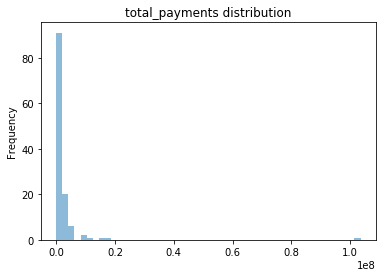

In [16]:
outlier_plt(4)
print_outlier(4,0.2e8)

                    poi     salary  to_messages  deferral_payments  \
HIRKO JOSEPH        1.0        NaN          NaN            10259.0   
LAY KENNETH L       1.0  1072321.0       4273.0           202911.0   
PAI LOU L           0.0   261879.0          NaN                NaN   
RICE KENNETH D      1.0   420636.0        905.0                NaN   
SKILLING JEFFREY K  1.0  1111258.0       3627.0                NaN   

                    total_payments  exercised_stock_options      bonus  \
HIRKO JOSEPH               91093.0               30766064.0        NaN   
LAY KENNETH L          103559793.0               34348384.0  7000000.0   
PAI LOU L                3123383.0               15364167.0  1000000.0   
RICE KENNETH D            505050.0               19794175.0  1750000.0   
SKILLING JEFFREY K       8682716.0               19250000.0  5600000.0   

                    restricted_stock  shared_receipt_with_poi  \
HIRKO JOSEPH                     NaN                      NaN   
LAY 

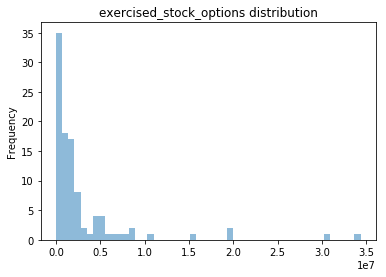

In [17]:
outlier_plt(5)
print_outlier(5,1.5e7)

                    poi     salary  to_messages  deferral_payments  \
BELDEN TIMOTHY N    1.0   213999.0       7991.0          2144013.0   
LAVORATO JOHN J     0.0   339288.0       7259.0                NaN   
LAY KENNETH L       1.0  1072321.0       4273.0           202911.0   
SKILLING JEFFREY K  1.0  1111258.0       3627.0                NaN   

                    total_payments  exercised_stock_options      bonus  \
BELDEN TIMOTHY N         5501630.0                 953136.0  5249999.0   
LAVORATO JOHN J         10425757.0                4158995.0  8000000.0   
LAY KENNETH L          103559793.0               34348384.0  7000000.0   
SKILLING JEFFREY K       8682716.0               19250000.0  5600000.0   

                    restricted_stock  shared_receipt_with_poi  \
BELDEN TIMOTHY N            157569.0                   5521.0   
LAVORATO JOHN J            1008149.0                   3962.0   
LAY KENNETH L             14761694.0                   2411.0   
SKILLING JEFFREY K

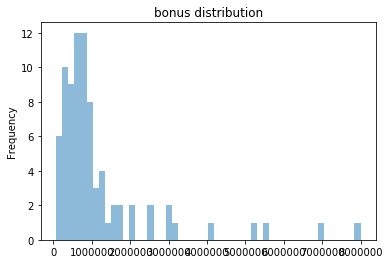

In [18]:
outlier_plt(6)
print_outlier(6,5e6)

                   poi     salary  to_messages  deferral_payments  \
LAY KENNETH L      1.0  1072321.0       4273.0           202911.0   
WHITE JR THOMAS E  0.0   317543.0          NaN                NaN   

                   total_payments  exercised_stock_options      bonus  \
LAY KENNETH L         103559793.0               34348384.0  7000000.0   
WHITE JR THOMAS E       1934359.0                1297049.0   450000.0   

                   restricted_stock  shared_receipt_with_poi  \
LAY KENNETH L            14761694.0                   2411.0   
WHITE JR THOMAS E        13847074.0                      NaN   

                   restricted_stock_deferred  total_stock_value  expenses  \
LAY KENNETH L                            NaN         49110078.0   99832.0   
WHITE JR THOMAS E                        NaN         15144123.0   81353.0   

                   loan_advances  from_messages       other  \
LAY KENNETH L         81525000.0           36.0  10359729.0   
WHITE JR THOMAS E    

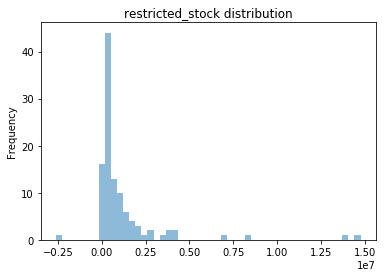

In [19]:
outlier_plt(7)
print_outlier(7,1e7)
print df[df['restricted_stock']<= 0]
print df[df['restricted_stock']<= 0].index

In [20]:
df[df['restricted_stock']<= 0]

,poi,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
BHATNAGAR SANJAY,0.0,NaN,523.0,NaN,15456290.0,2604490.0,NaN,-2604490.0,463.0,15456290.0,NaN,NaN,NaN,29.0,137864.0,1.0,137864.0,NaN,NaN,0.0


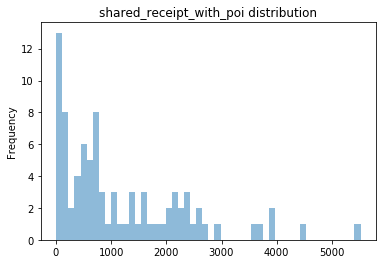

In [21]:
outlier_plt(8)
#print_outlier(8,4000)

                  poi  salary  to_messages  deferral_payments  total_payments  \
BHATNAGAR SANJAY  0.0     NaN        523.0                NaN      15456290.0   

                  exercised_stock_options  bonus  restricted_stock  \
BHATNAGAR SANJAY                2604490.0    NaN        -2604490.0   

                  shared_receipt_with_poi  restricted_stock_deferred  \
BHATNAGAR SANJAY                    463.0                 15456290.0   

                  total_stock_value  expenses  loan_advances  from_messages  \
BHATNAGAR SANJAY                NaN       NaN            NaN           29.0   

                     other  from_this_person_to_poi  director_fees  \
BHATNAGAR SANJAY  137864.0                      1.0       137864.0   

                  deferred_income  long_term_incentive  \
BHATNAGAR SANJAY              NaN                  NaN   

                  from_poi_to_this_person  
BHATNAGAR SANJAY                      0.0  
Index([u'BHATNAGAR SANJAY'], dtype='object')


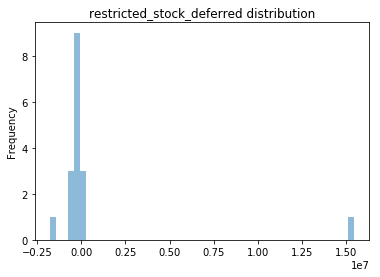

In [22]:
outlier_plt(9)
print_outlier(9,1.5e7)

                    poi     salary  to_messages  deferral_payments  \
HIRKO JOSEPH        1.0        NaN          NaN            10259.0   
LAY KENNETH L       1.0  1072321.0       4273.0           202911.0   
PAI LOU L           0.0   261879.0          NaN                NaN   
RICE KENNETH D      1.0   420636.0        905.0                NaN   
SKILLING JEFFREY K  1.0  1111258.0       3627.0                NaN   

                    total_payments  exercised_stock_options      bonus  \
HIRKO JOSEPH               91093.0               30766064.0        NaN   
LAY KENNETH L          103559793.0               34348384.0  7000000.0   
PAI LOU L                3123383.0               15364167.0  1000000.0   
RICE KENNETH D            505050.0               19794175.0  1750000.0   
SKILLING JEFFREY K       8682716.0               19250000.0  5600000.0   

                    restricted_stock  shared_receipt_with_poi  \
HIRKO JOSEPH                     NaN                      NaN   
LAY 

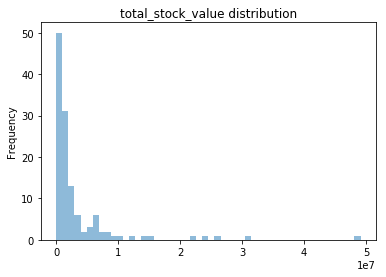

In [23]:
outlier_plt(10)
print_outlier(10,2e7)

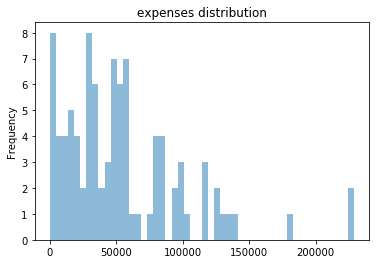

In [24]:
outlier_plt(11)
#print_outlier(11,200000)

               poi     salary  to_messages  deferral_payments  total_payments  \
LAY KENNETH L  1.0  1072321.0       4273.0           202911.0     103559793.0   

               exercised_stock_options      bonus  restricted_stock  \
LAY KENNETH L               34348384.0  7000000.0        14761694.0   

               shared_receipt_with_poi  restricted_stock_deferred  \
LAY KENNETH L                   2411.0                        NaN   

               total_stock_value  expenses  loan_advances  from_messages  \
LAY KENNETH L         49110078.0   99832.0     81525000.0           36.0   

                    other  from_this_person_to_poi  director_fees  \
LAY KENNETH L  10359729.0                     16.0            NaN   

               deferred_income  long_term_incentive  from_poi_to_this_person  
LAY KENNETH L        -300000.0            3600000.0                    123.0  
Index([u'LAY KENNETH L'], dtype='object')


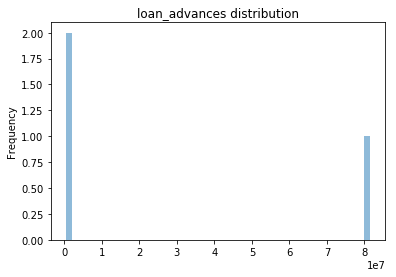

In [25]:
outlier_plt(12)
print_outlier(12,1e7)

                     poi    salary  to_messages  deferral_payments  \
KAMINSKI WINCENTY J  0.0  275101.0       4607.0                NaN   

                     total_payments  exercised_stock_options     bonus  \
KAMINSKI WINCENTY J       1086821.0                 850010.0  400000.0   

                     restricted_stock  shared_receipt_with_poi  \
KAMINSKI WINCENTY J          126027.0                    583.0   

                     restricted_stock_deferred  total_stock_value  expenses  \
KAMINSKI WINCENTY J                        NaN           976037.0   83585.0   

                     loan_advances  from_messages   other  \
KAMINSKI WINCENTY J            NaN        14368.0  4669.0   

                     from_this_person_to_poi  director_fees  deferred_income  \
KAMINSKI WINCENTY J                    171.0            NaN              NaN   

                     long_term_incentive  from_poi_to_this_person  
KAMINSKI WINCENTY J             323466.0                     41.0 

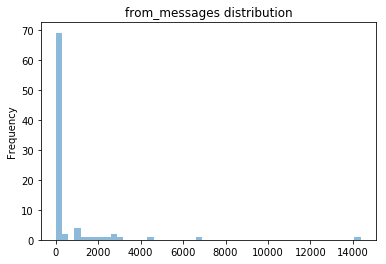

In [26]:
outlier_plt(13)
print_outlier(13,12000)

                poi     salary  to_messages  deferral_payments  \
FREVERT MARK A  0.0  1060932.0       3275.0          6426990.0   
LAY KENNETH L   1.0  1072321.0       4273.0           202911.0   

                total_payments  exercised_stock_options      bonus  \
FREVERT MARK A      17252530.0               10433518.0  2000000.0   
LAY KENNETH L      103559793.0               34348384.0  7000000.0   

                restricted_stock  shared_receipt_with_poi  \
FREVERT MARK A         4188667.0                   2979.0   
LAY KENNETH L         14761694.0                   2411.0   

                restricted_stock_deferred  total_stock_value  expenses  \
FREVERT MARK A                        NaN         14622185.0   86987.0   
LAY KENNETH L                         NaN         49110078.0   99832.0   

                loan_advances  from_messages       other  \
FREVERT MARK A      2000000.0           21.0   7427621.0   
LAY KENNETH L      81525000.0           36.0  10359729.0   

  

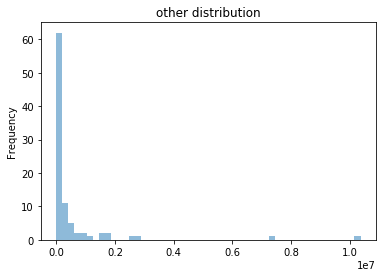

In [27]:
outlier_plt(14)
print_outlier(14,0.6e7)

                  poi    salary  to_messages  deferral_payments  \
BECK SALLY W      0.0  231330.0       7315.0                NaN   
DELAINEY DAVID W  1.0  365163.0       3093.0                NaN   
KEAN STEVEN J     0.0  404338.0      12754.0                NaN   
LAVORATO JOHN J   0.0  339288.0       7259.0                NaN   

                  total_payments  exercised_stock_options      bonus  \
BECK SALLY W            969068.0                      NaN   700000.0   
DELAINEY DAVID W       4747979.0                2291113.0  3000000.0   
KEAN STEVEN J          1747522.0                2022048.0  1000000.0   
LAVORATO JOHN J       10425757.0                4158995.0  8000000.0   

                  restricted_stock  shared_receipt_with_poi  \
BECK SALLY W              126027.0                   2639.0   
DELAINEY DAVID W         1323148.0                   2097.0   
KEAN STEVEN J            4131594.0                   3639.0   
LAVORATO JOHN J          1008149.0                 

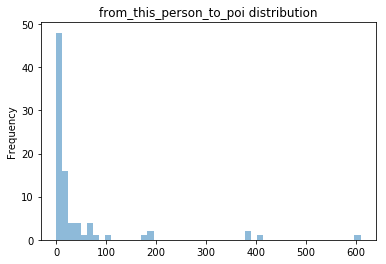

In [28]:
outlier_plt(15)
print_outlier(15,300)

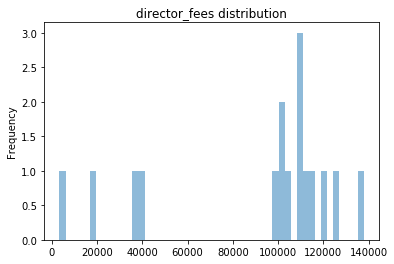

In [29]:
outlier_plt(16)
#print_outlier(16,1e7)

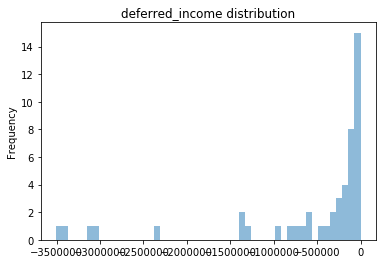

In [30]:
outlier_plt(17)
#print_outlier(7,1e7)

                 poi     salary  to_messages  deferral_payments  \
LAY KENNETH L    1.0  1072321.0       4273.0           202911.0   
MARTIN AMANDA K  0.0   349487.0       1522.0            85430.0   

                 total_payments  exercised_stock_options      bonus  \
LAY KENNETH L       103559793.0               34348384.0  7000000.0   
MARTIN AMANDA K       8407016.0                2070306.0        NaN   

                 restricted_stock  shared_receipt_with_poi  \
LAY KENNETH L          14761694.0                   2411.0   
MARTIN AMANDA K               NaN                    477.0   

                 restricted_stock_deferred  total_stock_value  expenses  \
LAY KENNETH L                          NaN         49110078.0   99832.0   
MARTIN AMANDA K                        NaN          2070306.0    8211.0   

                 loan_advances  from_messages       other  \
LAY KENNETH L       81525000.0           36.0  10359729.0   
MARTIN AMANDA K            NaN          230.0   2

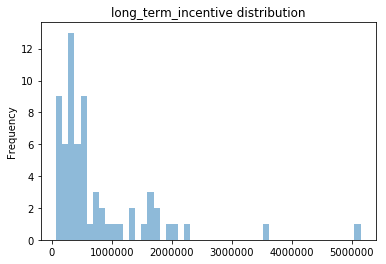

In [31]:
outlier_plt(18)
print_outlier(18,3000000)

                 poi    salary  to_messages  deferral_payments  \
LAVORATO JOHN J  0.0  339288.0       7259.0                NaN   

                 total_payments  exercised_stock_options      bonus  \
LAVORATO JOHN J      10425757.0                4158995.0  8000000.0   

                 restricted_stock  shared_receipt_with_poi  \
LAVORATO JOHN J         1008149.0                   3962.0   

                 restricted_stock_deferred  total_stock_value  expenses  \
LAVORATO JOHN J                        NaN          5167144.0   49537.0   

                 loan_advances  from_messages   other  \
LAVORATO JOHN J            NaN         2585.0  1552.0   

                 from_this_person_to_poi  director_fees  deferred_income  \
LAVORATO JOHN J                    411.0            NaN              NaN   

                 long_term_incentive  from_poi_to_this_person  
LAVORATO JOHN J            2035380.0                    528.0  
Index([u'LAVORATO JOHN J'], dtype='object')


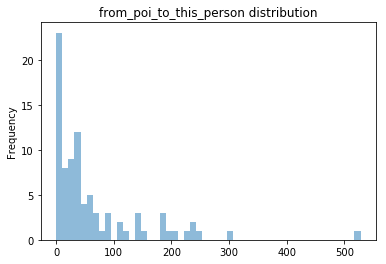

In [32]:
outlier_plt(19)
print_outlier(19,500)

** Outlier summary**

In total we found three outliers here in this dataset. By skimming the dataset we can see that "THE TRAVEL AGENCY IN THE PARK" and "LOCKHART EUGENE E" are the fake data. So we need to delete these two rows. Another outlier "TOTAL" was found by visualizing the data. This is the total amount of the other data, which shall also be omitted.

During the exploratory analysis, we also notice some values are way much higher than the other. For these cases, there are still reasonable data because some of them already indicate the poi, or some individuals have higher emails because of their positions.  

### 3: Create new feature(s)

In [33]:
# Add new features
# "to_poi_ratio" is the ratio of the from_this_person_to_poi/from_messages, 
# indicating that the ratio of this person recieving from the pois among all the messages 
# "from_poi_ratio" is the ratio of the from_poi_to_this_person/to_messages,
# indicating that the ratio of this person sending from the pois among all the messages 

features_list.append("to_poi_ratio")
features_list.append("from_poi_ratio")

df['to_poi_ratio'] = df['from_this_person_to_poi']/df['from_messages']
df['from_poi_ratio'] = df['from_poi_to_this_person']/df['to_messages']
df = df.fillna(0)

In [34]:
print "There are in total %d person" % df.shape[0]
print "For each person there are %d features after deleting one feature: email address" % df.shape[1]
print "Among which there are %d POIs" % df['poi'].sum()

There are in total 143 person
For each person there are 22 features after deleting one feature: email address
Among which there are 18 POIs


In [35]:
labels = df['poi']
features = df.drop('poi', 1)

Use scatter plot for different features to see if there are direct relationships and/or obvious decision boundary between each features

In [36]:
print features_list

['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'from_poi_to_this_person', 'to_poi_ratio', 'from_poi_ratio']


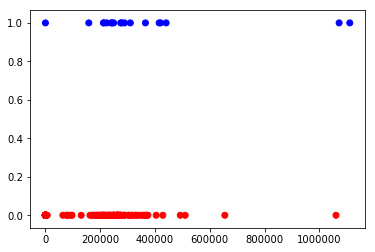

In [37]:
colors = np.where(df.poi ==0, 'r', 'b')
plt.scatter(df.salary, df.poi, color = colors)

### Task 4: Try a varity of classifiers

**Cross validation**
- Split the dataset into train and test data. 70% of the data will be used for training, the rest 30% will be used for testing.
- Use random_state(default = 42) to get same sampling, which will be helpful to analyze the algorithm.

In [38]:
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

/Users/xuemingli/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


**Select K Best features**

- SelectKBest removes all but the k highest scoring features
- f_classif: Compute the ANOVA F-value for the provided sample.

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

skb = SelectKBest(f_classif)

** Pipeline **

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV

pipeline =  Pipeline(steps=[("SKB", skb), ("NaiveBayes", GaussianNB())])

/Users/xuemingli/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


** GridSearchCV**

- GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.
- The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [41]:
from sklearn.grid_search import GridSearchCV
params_skb = {'SKB__k': [5,7,13,17]} # Use pipeline to search for the best amount of features
clf = GridSearchCV(pipeline, param_grid = params_skb, scoring = 'f1')
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

After fitting the classifier, select "K Best" scores of the feautrues.

In [42]:
# here we use i+1 becuase the first feature in the list is poi, which shall not be included in the fitting.
features_selected = [features_list[i+1] for i in clf.best_estimator_.named_steps['SKB'].get_support(indices=True)]
print 'The Features Selected:'
print features_selected

print "The best estimator:"
print clf.best_estimator_

The Features Selected:
['salary', 'total_payments', 'exercised_stock_options', 'bonus', 'shared_receipt_with_poi', 'total_stock_value', 'to_poi_ratio']
The best estimator:
Pipeline(steps=[('SKB', SelectKBest(k=7, score_func=<function f_classif at 0x111040938>)), ('NaiveBayes', GaussianNB(priors=None))])


In [43]:
features_scores = SelectKBest(k=12).fit(features, labels)
print features_scores.scores_

[ 18.28968404   1.64634113   0.22461127   8.77277773  24.81507973
  20.79225205   9.21281062   8.58942073   0.06549965  24.18289868
   6.09417331   7.18405566   0.16970095   4.18747751   2.38261211
   2.1263278   11.45847658   9.92218601   5.24344971  16.40971255
   3.12809175]


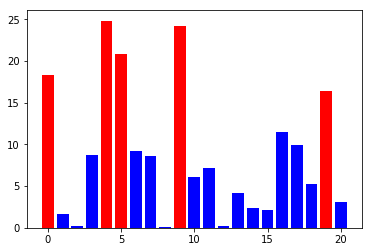

['salary',
 'exercised_stock_options',
 'bonus',
 'total_stock_value',
 'to_poi_ratio']

In [44]:
features_k = []
plt.figure()
#COLORS = 'bgrcmyk'
#colors = ['r' if feature>10 else 'b' for feature in features_k.scores_]
for i, feature in enumerate(features_scores.scores_):
    plt.bar(i, feature, color = ['r' if feature>15 else 'b']) 
    if feature >15:
        features_k.append(features_list[i+1])
plt.show()
features_k

There are 5 features with high scores, while the others are much lower. So we can choose k=5

In order to see how much KBest helps to optimize the results, hereby I used Naive Bayes without KBest.

In [45]:
features_train_k =pd.DataFrame()
features_test_k =pd.DataFrame()
for feature in features_k:
    features_train_k[feature] = features_train[feature]
    features_test_k[feature] = features_test[feature]


In [46]:
clf_0 = GaussianNB()
clf_0.fit(features_train, labels_train)
pred_0 = clf_0.predict(features_test)

In [47]:
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score

rec_sc_0 = recall_score(labels_test, pred_0)
pre_sc_0 = average_precision_score(labels_test, pred_0)
acc_0 = accuracy_score(pred_0, labels_test)
print "Accuracy before KBest:", acc_0
print "Precision before KBest:", pre_sc_0
print "Recall before KBest:", rec_sc_0
print "\n"

Accuracy before KBest: 0.883720930233
Precision before KBest: 0.48488372093
Recall before KBest: 0.4




In [48]:
clf_0 = GaussianNB()
clf_0.fit(features_train_k, labels_train)
pred_0 = clf_0.predict(features_test_k)

In [49]:
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score

rec_sc_0 = recall_score(labels_test, pred_0)
pre_sc_0 = average_precision_score(labels_test, pred_0)
acc_0 = accuracy_score(pred_0, labels_test)
print "Accuracy before KBest:", acc_0
print "Precision before KBest:", pre_sc_0
print "Recall before KBest:", rec_sc_0
print "\n"

Accuracy before KBest: 0.906976744186
Precision before KBest: 0.623255813953
Recall before KBest: 0.6




As shown in the results, the accuracy didn't change, but the other two evaluation metrics get improved after using KBest. 

In [61]:
# Using KNN without tuning the parameters
clf = KNeighborsClassifier()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

In [62]:
rec_sc = recall_score(labels_test, pred)
pre_sc = average_precision_score(labels_test, pred)
acc = accuracy_score(pred, labels_test)
print "Accuracy after KBest:", acc
print "Precision after KBest:", pre_sc
print "Recall after KBest:", rec_sc

Accuracy after KBest: 0.883720930233
Precision after KBest: 0.558139534884
Recall after KBest: 0.0


In [63]:
# Using GridSearchCV for KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
parameters = {'n_neighbors':[1,3,5,7],'leaf_size':[1, 3, 5, 10, 30,50], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights' : ['uniform', 'distance']}
clf = GridSearchCV(knn,parameters, scoring = 'f1')
clf.fit(features_train_k, labels_train)
pred = clf.predict(features_test_k)
print clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')


In [64]:
rec_sc = recall_score(labels_test, pred)
pre_sc = average_precision_score(labels_test, pred)
acc = accuracy_score(pred, labels_test)
print "Accuracy after tuning:", acc
print "Precision after tuning:", pre_sc
print "Recall after tuning:", rec_sc

Accuracy after tuning: 0.860465116279
Precision after tuning: 0.313178294574
Recall after tuning: 0.2


In [65]:
#Using DecisionTreeClassifier without tuning the parameters
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(features_train_k, labels_train)
pred = clf.predict(features_test_k)
rec_sc = recall_score(labels_test, pred)
pre_sc = average_precision_score(labels_test, pred)
acc = accuracy_score(pred, labels_test)
print "Accuracy before tuning:", acc
print "Precision before tuning:", pre_sc
print "Recall before tuning:", rec_sc

Accuracy before tuning: 0.860465116279
Precision before tuning: 0.43488372093
Recall before tuning: 0.4


In [65]:
#Using DecisionTreeClassifier after tuning the parameters
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

parameters = {'n_neighbors':[1,3,5,7],'leaf_size':[1, 3, 5, 10, 30,50], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights' : ['uniform', 'distance']}
clf = GridSearchCV(dt,parameters, scoring = 'f1')


clf.fit(features_train_k, labels_train)
pred = clf.predict(features_test_k)
rec_sc = recall_score(labels_test, pred)
pre_sc = average_precision_score(labels_test, pred)
acc = accuracy_score(pred, labels_test)
print "Accuracy before tuning:", acc
print "Precision before tuning:", pre_sc
print "Recall before tuning:", rec_sc

Accuracy before tuning: 0.860465116279
Precision before tuning: 0.43488372093
Recall before tuning: 0.4


### 5: Dump the classifier, dataset, and features_list 


In [62]:
from tester import dump_classifier_and_data
dump_classifier_and_data(clf, df, features_list)